# **SEATWORK 7.1 Data Wrangling and Notebook Demonstration**

**Name**: Calingo, Christian Lei S.

**Section**: CPE22S3

**Course**: Computational Thinking With Python

**Course Code** : CPE311

# **7.3 (RESHAPING DATA)**

# **Setup**

---

[**We need to import pandas and read in the long-format data to get started**](https://)

In [2]:
import pandas as pd
long_df = pd.read_csv(
'data/long_data.csv',
usecols=['date', 'datatype', 'value']
).rename(
columns={
'value' : 'temp_C'
}
).assign(
date=lambda x: pd.to_datetime(x.date),
temp_F=lambda x: (x.temp_C * 9/5) + 32
)
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


# **Transposing**

---

[**Transposing swaps the rows and the columns. We use the T attribute to do so**](https://)

In [3]:
long_df.head().T # transposing the table means the columns will become the rows and the rows wil become the columns

,0,1,2,3,4
datatype,TMAX,TMIN,TOBS,TMAX,TMIN
date,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-02 00:00:00,2018-10-02 00:00:00
temp_C,21.1,8.9,13.9,23.9,13.9
temp_F,69.98,48.02,57.02,75.02,57.02


# **Pivoting**

---

[**Going from long to wide format**](https://)

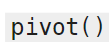

image.png
image.png


[**We can restructure our data by picking a column to go in the index ( index ), a column whose unique values will become column names ( columns ), and the values to place
in those columns ( values ). The pivot() method can be used when we don't need to perform any aggregation in addition to our restructuring (when our index is unique);
if this is not the case, we need the pivot_table() method which we will cover in future modules.Out[1]:In [2]:
long_df.head().TOut[2]:**](https://)


In [9]:
pivoted_df = long_df.pivot(
index='date', columns='datatype', values='temp_C' # pivot is almost the same as creating a new table. However, we can use unique values
)                                                 # in this case, we will the use the values in temp_C
pivoted_df.head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


**Trying pivot() on temp_F**

In [15]:
pivoted_df = long_df.pivot(
index='date', columns='datatype', values='temp_F' # creating a pivoted table with temp_F as values
)
pivoted_df.head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,69.98,48.02,57.02
2018-10-02,75.02,57.02,62.96
2018-10-03,77.00,60.08,60.98
2018-10-04,73.04,53.06,53.06
2018-10-05,73.94,53.06,66.02


[**Using the pd.pivot function gives you the same results**](https://)

In [13]:
pd.pivot(
data =long_df, index = 'date', columns = 'datatype', values = 'temp_C' # trying pd.pvot() which gives the same result above
).head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


**Trying pd.pvot() on temp_F**

In [16]:
pd.pivot(
data =long_df, index = 'date', columns = 'datatype', values = 'temp_F' # trying pd.pvot() which gives the same result above
).head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,69.98,48.02,57.02
2018-10-02,75.02,57.02,62.96
2018-10-03,77.00,60.08,60.98
2018-10-04,73.04,53.06,53.06
2018-10-05,73.94,53.06,66.02


[**Grabbing the summary results with describe()**](https://)

In [14]:
pivoted_df.describe()

datatype,TMAX,TMIN,TOBS
count,31.000000,31.000000,31.000000
mean,16.829032,7.561290,10.022581
std,5.714962,6.513252,6.596550
min,7.800000,-1.100000,-1.100000
25%,12.750000,2.500000,5.550000
50%,16.100000,6.700000,8.300000
75%,21.950000,13.600000,16.100000
max,26.700000,17.800000,21.700000


[**We can also provide multiple values to pivot on, which will result in a hierarchical index:**](https://)

In [17]:
pivoted_df = long_df.pivot(
index='date', columns='datatype', values=['temp_C', 'temp_F']
)
pivoted_df.head()

# since pivting a table allows us to create a new table for unique values
# having 2 values in the values parameter is like concatenating 2 pivoted tables

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

[**Selecting TMIN of temp_F**](https://)

In [18]:
pivoted_df['temp_F']['TMIN'].head() #selecting TMIN of the temp_F column

date
2018-10-01    48.02
2018-10-02    57.02
2018-10-03    60.08
2018-10-04    53.06
2018-10-05    53.06
Name: TMIN, dtype: float64

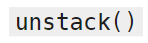

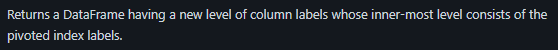

[**We have been working with a single index throughout this chapter; however, we can create an index from any number of columns with set_index() . This gives us a
MultiIndex where the outermost level corresponds to the first element in the list provided to set_index() :**](https://)

In [19]:
multi_index_df = long_df.set_index(['date', 'datatype'])
multi_index_df.index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN'),
            ('2018-10-02', 'TOBS'),
            ('2018-10-03', 'TMAX'),
            ('2018-10-03', 'TMIN'),
            ('2018-10-03', 'TOBS'),
            ('2018-10-04', 'TMAX'),
            ('2018-10-04', 'TMIN'),
            ('2018-10-04', 'TOBS'),
            ('2018-10-05', 'TMAX'),
            ('2018-10-05', 'TMIN'),
            ('2018-10-05', 'TOBS'),
            ('2018-10-06', 'TMAX'),
            ('2018-10-06', 'TMIN'),
            ('2018-10-06', 'TOBS'),
            ('2018-10-07', 'TMAX'),
            ('2018-10-07', 'TMIN'),
            ('2018-10-07', 'TOBS'),
            ('2018-10-08', 'TMAX'),
            ('2018-10-08', 'TMIN'),
            ('2018-10-08', 'TOBS'),
            ('2018-10-09', 'TMAX'),
            ('2018-10-09', 'TMIN'),
            ('2018-10-09', 'TOBS'),
            ('2018-10-10', '

[**Notice there are now 2 index sections of the dataframe**](https://)

In [21]:
multi_index_df #this table shows the different TMAX, TMIN, TOBS of days from October 1 to October 31

temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02
...                     ...     ...
2018-10-30 TMIN         2.2   35.96
           TOBS         5.0   41.00
2018-10-31 TMAX        12.2   53.96
           TMIN         0.0   32.00
           TOBS         0.0   32.00

[93 rows x 2 columns]

[**With the MultiIndex , we can no longer use pivot() . We must now use unstack() , which by default moves the innermost index onto the columns:** ](https://)

In [22]:
unstacked_df = multi_index_df.unstack()
unstacked_df.head() #unstackinga multi_index df gives us the same results with the pivoted df

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

[**The unstack() method also provides the fill_value parameter, which let's us fill-in any NaN values that might arise from this restructuring of the data. Consider the
case that we have data for the average temperature on October 1, 2018, but no other date:**](https://)

In [24]:
extra_data = long_df.append(
[{'datatype' : 'TAVG', 'date': '2018-10-01', 'temp_C': 10, 'temp_F': 50}]
).set_index(['date', 'datatype']).sort_index()
extra_data.head(8)

<ipython-input-24-0babc9bf7ca2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extra_data = long_df.append(
<ipython-input-24-0babc9bf7ca2>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  ).set_index(['date', 'datatype']).sort_index()


temp_C  temp_F
date       datatype                
2018-10-01 TAVG        10.0   50.00
           TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02
           TOBS        17.2   62.96
2018-10-03 TMAX        25.0   77.00

[**If we use unstack() in this case, we will have NaN for the TAVG columns every day but October 1, 2018**](https://)

In [25]:
extra_data.unstack().head() #the following days were NaN values since in the extra_data, we only specifude the TAVG for October 1, 2018

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
2018-10-01   10.0  21.1   8.9  13.9   50.0  69.98  48.02  57.02
2018-10-02    NaN  23.9  13.9  17.2    NaN  75.02  57.02  62.96
2018-10-03    NaN  25.0  15.6  16.1    NaN  77.00  60.08  60.98
2018-10-04    NaN  22.8  11.7  11.7    NaN  73.04  53.06  53.06
2018-10-05    NaN  23.3  11.7  18.9    NaN  73.94  53.06  66.02

**Trying different day and unstacking it**

In [26]:
extra_data2 = long_df.append(
[{'datatype' : 'TAVG', 'date': '2018-10-02', 'temp_C': 10, 'temp_F': 50}]
).set_index(['date', 'datatype']).sort_index()
extra_data2.head(8)

<ipython-input-26-cd1d1619fd22>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extra_data2 = long_df.append(
<ipython-input-26-cd1d1619fd22>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  ).set_index(['date', 'datatype']).sort_index()


temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TAVG        10.0   50.00
           TMAX        23.9   75.02
           TMIN        13.9   57.02
           TOBS        17.2   62.96
2018-10-03 TMAX        25.0   77.00

In [33]:
extra_data2.unstack() #as you can see, since we specified on the October 2nd, the October 1st become NaN along with the rest

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
2018-10-01    NaN  21.1   8.9  13.9    NaN  69.98  48.02  57.02
2018-10-02   10.0  23.9  13.9  17.2   50.0  75.02  57.02  62.96
2018-10-03    NaN  25.0  15.6  16.1    NaN  77.00  60.08  60.98
2018-10-04    NaN  22.8  11.7  11.7    NaN  73.04  53.06  53.06
2018-10-05    NaN  23.3  11.7  18.9    NaN  73.94  53.06  66.02
2018-10-06    NaN  20.0  13.3  16.1    NaN  68.00  55.94  60.98
2018-10-07    NaN  20.0  16.1  20.0    NaN  68.00  60.98  68.00
2018-10-08    NaN  26.7  17.8  17.8    NaN  80.06  64.04  64.04
2018-10-09    NaN  18.9  17.2  17.8    NaN  66.02  62.96  64.04
2018-10-10    NaN  24.4  17.2  18.3    NaN  75.92  62.96  64.94
2018-10-11    NaN  26.1  17.8  21.7    NaN  78.98  64.04  71.06
2018-10-12    NaN  22.8  14.4  15.6    NaN  73.04  57.92  60.08
2018-10-13    NaN  15.6   7.2   8.3    NaN  60.08  44.96  46.94
2018-10-14    NaN  13.3   5.6   6.7    NaN  55.94  42.08  44.06
2018-10-15    NaN  13.3   6.7  10.0    NaN  55.94  44.06  50.00
2018-10-16    NaN  18.9   7.8   7.8    NaN  66.02  46.04  46.04
2018-10-17    NaN  13.3   3.3   5.0    NaN  55.94  37.94  41.00
2018-10-18    NaN  16.1   4.4   5.0    NaN  60.98  39.92  41.00
2018-10-19    NaN  10.0  -1.1   0.0    NaN  50.00  30.02  32.00
2018-10-20    NaN  15.0  -0.6  10.6    NaN  59.00  30.92  51.08
2018-10-21    NaN  16.7   7.8   7.8    NaN  62.06  46.04  46.04
2018-10-22    NaN   7.8  -1.1  -1.1    NaN  46.04  30.02  30.02
2018-10-23    NaN  15.6  -1.1  10.0    NaN  60.08  30.02  50.00
2018-10-24    NaN  16.7   4.4   6.7    NaN  62.06  39.92  44.06
2018-10-25    NaN  11.7   2.8   2.8    NaN  53.06  37.04  37.04
2018-10-26    NaN   9.4  -0.6  -0.6    NaN  48.92  30.92  30.92
2018-10-27    NaN   8.9  -0.6   6.1    NaN  48.02  30.92  42.98
2018-10-28    NaN   8.3   5.0   7.2    NaN  46.94  41.00  44.96
2018-10-29    NaN  10.6   6.7   8.3    NaN  51.08  44.06  46.94
2018-10-30    NaN  13.3   2.2   5.0    NaN  55.94  35.96  41.00
2018-10-31    NaN  12.2   0.0   0.0    NaN  53.96  32.00  32.00

[**To address this, we can pass in an appropriate fill_value . However, we are restricted to passing in a value for this, not a strategy (like we saw with fillna() ), so while
-40 is definitely not be the best value, we can use it to illustrate how this works, since this is the temperature at which Fahrenheit and Celsius are equal:**](https://)

In [32]:
extra_data.unstack(fill_value=-40)

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
2018-10-01   10.0  21.1   8.9  13.9   50.0  69.98  48.02  57.02
2018-10-02  -40.0  23.9  13.9  17.2  -40.0  75.02  57.02  62.96
2018-10-03  -40.0  25.0  15.6  16.1  -40.0  77.00  60.08  60.98
2018-10-04  -40.0  22.8  11.7  11.7  -40.0  73.04  53.06  53.06
2018-10-05  -40.0  23.3  11.7  18.9  -40.0  73.94  53.06  66.02
2018-10-06  -40.0  20.0  13.3  16.1  -40.0  68.00  55.94  60.98
2018-10-07  -40.0  20.0  16.1  20.0  -40.0  68.00  60.98  68.00
2018-10-08  -40.0  26.7  17.8  17.8  -40.0  80.06  64.04  64.04
2018-10-09  -40.0  18.9  17.2  17.8  -40.0  66.02  62.96  64.04
2018-10-10  -40.0  24.4  17.2  18.3  -40.0  75.92  62.96  64.94
2018-10-11  -40.0  26.1  17.8  21.7  -40.0  78.98  64.04  71.06
2018-10-12  -40.0  22.8  14.4  15.6  -40.0  73.04  57.92  60.08
2018-10-13  -40.0  15.6   7.2   8.3  -40.0  60.08  44.96  46.94
2018-10-14  -40.0  13.3   5.6   6.7  -40.0  55.94  42.08  44.06
2018-10-15  -40.0  13.3   6.7  10.0  -40.0  55.94  44.06  50.00
2018-10-16  -40.0  18.9   7.8   7.8  -40.0  66.02  46.04  46.04
2018-10-17  -40.0  13.3   3.3   5.0  -40.0  55.94  37.94  41.00
2018-10-18  -40.0  16.1   4.4   5.0  -40.0  60.98  39.92  41.00
2018-10-19  -40.0  10.0  -1.1   0.0  -40.0  50.00  30.02  32.00
2018-10-20  -40.0  15.0  -0.6  10.6  -40.0  59.00  30.92  51.08
2018-10-21  -40.0  16.7   7.8   7.8  -40.0  62.06  46.04  46.04
2018-10-22  -40.0   7.8  -1.1  -1.1  -40.0  46.04  30.02  30.02
2018-10-23  -40.0  15.6  -1.1  10.0  -40.0  60.08  30.02  50.00
2018-10-24  -40.0  16.7   4.4   6.7  -40.0  62.06  39.92  44.06
2018-10-25  -40.0  11.7   2.8   2.8  -40.0  53.06  37.04  37.04
2018-10-26  -40.0   9.4  -0.6  -0.6  -40.0  48.92  30.92  30.92
2018-10-27  -40.0   8.9  -0.6   6.1  -40.0  48.02  30.92  42.98
2018-10-28  -40.0   8.3   5.0   7.2  -40.0  46.94  41.00  44.96
2018-10-29  -40.0  10.6   6.7   8.3  -40.0  51.08  44.06  46.94
2018-10-30  -40.0  13.3   2.2   5.0  -40.0  55.94  35.96  41.00
2018-10-31  -40.0  12.2   0.0   0.0  -40.0  53.96  32.00  32.00



---


# **Melting**

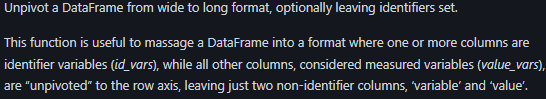


---



# **Setup**


---


**[Going from wide to long format.](https://)**



In [47]:
wide_df2 = pd.read_csv('data/wide_data.csv')
wide_df2

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1
6,2018-10-07,20.0,16.1,20.0
7,2018-10-08,26.7,17.8,17.8
8,2018-10-09,18.9,17.2,17.8
9,2018-10-10,24.4,17.2,18.3


# **melt()**

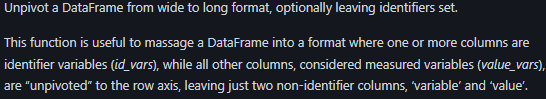

[**In order to go from wide format to long format, we use the melt() method. We have to specify**](https://)

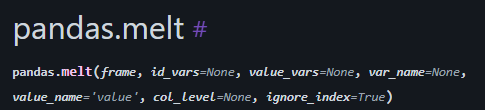

*   which column contains the unique identifier for each row ( date , here)
to id_vars
*   The column(s) that contain the values ( TMAX , TMIN , and TOBS , here) to value_vars
*   value_name : what to call the column that will contain all the values once melted
*   var_name : what to call the column that will contain the names of the variables being measured





In [48]:
melted_df = wide_df2.melt(
id_vars='date',
value_vars=['TMAX', 'TMIN', 'TOBS'],
value_name='temp_C',
var_name='measurement'
)
melted_df

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0
3,2018-10-04,TMAX,22.8
4,2018-10-05,TMAX,23.3
...,...,...,...
88,2018-10-27,TOBS,6.1
89,2018-10-28,TOBS,7.2
90,2018-10-29,TOBS,8.3
91,2018-10-30,TOBS,5.0


[**Just as we also had pd.pivot() there is a pd.melt()**](https://)

In [49]:
pd.melt(
wide_df2,
id_vars='date',
value_vars=['TMAX', 'TMIN', 'TOBS'],
value_name='temp_C',
var_name='measurement'
).head()

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0
3,2018-10-04,TMAX,22.8
4,2018-10-05,TMAX,23.3


# **stack()**

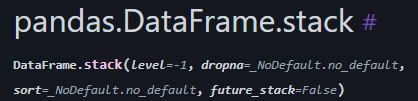

[**Another option is stack() which will pivot the columns of the dataframe into the innermost level of a MultiIndex . To illustrate this, let's set our index to be the date
column**](https://)

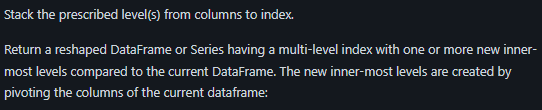

In [50]:
wide_df2.set_index('date', inplace=True)
wide_df2

,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9
2018-10-06,20.0,13.3,16.1
2018-10-07,20.0,16.1,20.0
2018-10-08,26.7,17.8,17.8
2018-10-09,18.9,17.2,17.8


[**By running stack() now, we will create a second level in our index which will contain the column names of our dataframe ( TMAX , TMIN , TOBS ). This will leave us with a
Series containing the values**](https://)

In [53]:
stacked_series = wide_df2.stack()
stacked_series

date            
2018-10-01  TMAX    21.1
            TMIN     8.9
            TOBS    13.9
2018-10-02  TMAX    23.9
            TMIN    13.9
                    ... 
2018-10-30  TMIN     2.2
            TOBS     5.0
2018-10-31  TMAX    12.2
            TMIN     0.0
            TOBS     0.0
Length: 93, dtype: float64

[**We can use the to_frame() method on our Series object to turn it into a DataFrame . Since the series doesn't have a name at the moment, we will pass in the name as
an argument:**](https://)

In [54]:
stacked_df = stacked_series.to_frame('values')
stacked_df

values
date                   
2018-10-01 TMAX    21.1
           TMIN     8.9
           TOBS    13.9
2018-10-02 TMAX    23.9
           TMIN    13.9
...                 ...
2018-10-30 TMIN     2.2
           TOBS     5.0
2018-10-31 TMAX    12.2
           TMIN     0.0
           TOBS     0.0

[93 rows x 1 columns]

[**Using MultiIndex at stacked_df**](https://)

In [55]:
stacked_df.index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN'),
            ('2018-10-02', 'TOBS'),
            ('2018-10-03', 'TMAX'),
            ('2018-10-03', 'TMIN'),
            ('2018-10-03', 'TOBS'),
            ('2018-10-04', 'TMAX'),
            ('2018-10-04', 'TMIN'),
            ('2018-10-04', 'TOBS'),
            ('2018-10-05', 'TMAX'),
            ('2018-10-05', 'TMIN'),
            ('2018-10-05', 'TOBS'),
            ('2018-10-06', 'TMAX'),
            ('2018-10-06', 'TMIN'),
            ('2018-10-06', 'TOBS'),
            ('2018-10-07', 'TMAX'),
            ('2018-10-07', 'TMIN'),
            ('2018-10-07', 'TOBS'),
            ('2018-10-08', 'TMAX'),
            ('2018-10-08', 'TMIN'),
            ('2018-10-08', 'TOBS'),
            ('2018-10-09', 'TMAX'),
            ('2018-10-09', 'TMIN'),
            ('2018-10-09', 'TOBS'),
            ('2018-10-10', '

[**At stacked_df, we don't have a name for data type**](https://)

In [56]:
stacked_df.index.names

FrozenList(['date', None])

[**To fix the issue, we are going to use rename() function**](https://)

In [57]:
stacked_df.index.rename(['date', 'datatype'], inplace=True)
stacked_df.index.names

FrozenList(['date', 'datatype'])